# Distributed Power Control
This method helps to find a stable configuration for the Cellular power levels of Mobile Devices. It also applies more generally to **Signals** and **Interferences** too.

The crux of the problem is as such: imagine that you are in a cocktail party and wish to speak to your friend.

Your friend is right beside you, but you cannot hear them properly and so you increase your volume. Simultaneously though, all other pairs in the room have the same idea and also increase their volume.

In turn, your friend cannot hear you either because your voice becomes drowned out by the increased voice of other people. All-in-all this process continues ad-infinitum until everyone is shouting.

## The Cocktail Party Problem
The problem was outlined in the previous cell, but clearly this is not how a Cocktail Party usually transpires. Instead, everyone finds a suitable and polite volume at which to speak so that everyone may be heard despite conversations happening everywhere else. 

This is the crux of the Distributed Power Control Algorithm. And as can be expected, it is **iterative**.

## Mathematically
We have $N$ transmitter / receiver pairs indexed by $i$. The transmitter is your phone a.k.a a Mobile Station, and the receiver is the tower, a.k.a Base Station.

The transmit power of this link $i$ is $p_i$. Note that the transmitted power from any MS (Mobile Station) just equates to interference for another MS.

We can create a Matrix $G$ to encode this transmitter signal / interference where
\begin{align}
G_{ii} &= \text{direct channel gain from transmitter i to receiver i}\\
G_{ij} &= \text{interference channels}
\end{align}

Thus we can then encode:

\begin{equation*}
\text{SIR}_i = \frac{G_{ij}p_i}{\sum_{j\neq i}G_{ii}p_j +n_i}
\end{equation*}

where the received power of the intended transmission at the receiver is $G_{ii} p_i$ (gain multiplied however much of there there is).
and the interference is the sum of $G_ii p_j$ over all transmitters $j$ (other than the intended receiver $i$). also there is a noise $n_i$ in the receiver electronics for each receiver $i$.

Then given we index $[t]$ as discrete _time_ slots, we know we need to maintain a minimum level of $\text{SIR}_i \geq \gamma_i$ because otherwise the receiver wouldn't understand our message.

We use this iterative algorithm:

$$
p_i[t+1] = \frac{\gamma_i}{\text{SIR}_i [t]}p_i[t]
$$

Note that when eventually the $\text{SIR}_i$ becomes equal to the desired $\gamma_i$, the above algorithm equilibriates.

### Optimisation

The problem of finding an optimal configuration of powers can be found be solving:


\begin{align}
&\!\min_{\mathbf{p}}        &\qquad& \sum_i p_i\\
&\text{subject to} &      & \text{SIR}_i(\mathbf{p}) \geq \gamma_i, \forall i\\
\end{align}



which if we plug the SIR equation in from above we get:

$$
\begin{align}
&\!\min_{\mathbf{p}}        &\qquad& \sum_i p_i\\
&\text{subject to} &      & \frac{G_{ii}p_i}{\sum_{j\neq i}G_{ij}p_j +n_i}\geq \gamma_i, \qquad\forall i\\
\end{align}
$$

which is equal to:

$$
\begin{align}
&\!\min_{\mathbf{p}}        &\qquad& \sum_i p_i\\
&\text{subject to} &      & G_{ii}p_i - \gamma_i (\sum_{j\neq i} G_{ij}p_j + n_i) \geq 0, \qquad \forall i\\
\end{align}
$$

### Game Theory

It can be done...


## Code

### Iteratatively:

In [148]:
import numpy as np
G = np.array([[1, 0.1, 0.2, 0.3],
     [0.2, 1, 0.1, 0.1],
     [0.2, 0.1, 1, 0.1],
     [0.1, 0.1, 0.1, 1]])

# each row is the subsequent iteration
# column i represents link i
SIR = np.empty((0, G.shape[1]))

gamma = [2.0, 2.5, 1.5, 2.0]
P = np.array([[1.0 ,1.0 ,1.0 ,1.0]]) # each row is the subsequent iteration too.
noise = 0.1

iterations = 20

for t in range(iterations):
    SIR_t = np.array([])
    for i in range(G.shape[1]):
        SIR_t = np.append(SIR_t, (G[i][i] * P[t][i])/ ( sum([G[i][x]*P[t][x] for x in range(G.shape[1]) if x != i]) + noise))
    P = np.vstack([P, np.array(gamma)/SIR_t*np.array(P[t])])
    SIR = np.vstack([SIR, SIR_t])

In [158]:
np.around(SIR, 2), np.around(P, 2)

(array([[1.43, 2.  , 2.  , 2.5 ],
        [2.28, 2.34, 1.28, 1.82],
        [1.83, 2.56, 1.55, 1.98],
        [2.02, 2.4 , 1.45, 1.97],
        [1.96, 2.49, 1.49, 1.97],
        [1.98, 2.46, 1.48, 1.98],
        [1.98, 2.48, 1.49, 1.98],
        [1.98, 2.48, 1.49, 1.99],
        [1.99, 2.48, 1.49, 1.99],
        [1.99, 2.49, 1.49, 1.99],
        [1.99, 2.49, 1.49, 1.99],
        [1.99, 2.49, 1.49, 1.99],
        [1.99, 2.49, 1.5 , 1.99],
        [1.99, 2.49, 1.5 , 2.  ],
        [2.  , 2.49, 1.5 , 2.  ],
        [2.  , 2.5 , 1.5 , 2.  ],
        [2.  , 2.5 , 1.5 , 2.  ],
        [2.  , 2.5 , 1.5 , 2.  ],
        [2.  , 2.5 , 1.5 , 2.  ],
        [2.  , 2.5 , 1.5 , 2.  ]]),
 array([[1.  , 1.  , 1.  , 1.  ],
        [1.4 , 1.25, 0.75, 0.8 ],
        [1.23, 1.34, 0.88, 0.88],
        [1.35, 1.3 , 0.85, 0.89],
        [1.33, 1.36, 0.88, 0.9 ],
        [1.37, 1.36, 0.89, 0.92],
        [1.38, 1.38, 0.9 , 0.92],
        [1.39, 1.39, 0.91, 0.93],
        [1.4 , 1.41, 0.92, 0.94],
        [1.4

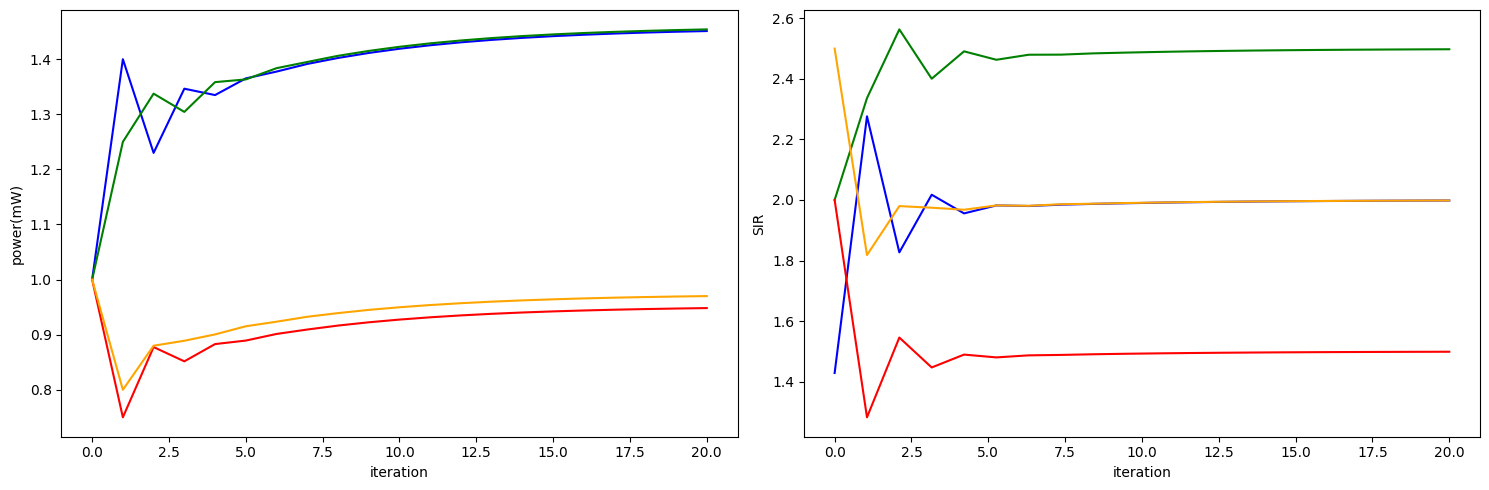

In [186]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#power to iteration graph
xx = np.linspace(0, 20, 21)
colours = ['blue', 'green', 'red', 'orange']
for i, c in zip(range(G.shape[1]), colours):
    yy = P[:,i]
    ax1.plot(xx, yy, color=c)
ax1.set_xlabel('iteration')
ax1.set_ylabel('power(mW)')
#sir to it graph
xx = np.linspace(0, 20, 20)
colours = ['blue', 'green', 'red', 'orange']
for i, c in zip(range(G.shape[1]), colours):
    yy = SIR[:,i]
    ax2.plot(xx, yy, color=c)
ax2.set_xlabel('iteration')
ax2.set_ylabel('SIR')
plt.tight_layout()
plt.show()